In [1]:
## Requires condaScanpy1_4_7.yaml

import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import scvelo as scv
import glob
import os

sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

/wynton/home/ye/codymowery/miniconda3/envs/scanpy_sagarbatch2_umap0.3.10/lib/python3.8/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.7.dev26+gc255fa10 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0


# Merge with Velocyto outputs

In [2]:
adata_pp_gex = sc.read('Fig3_filteredGEX.h5ad')

In [3]:
## Load velocyto outputs
vc_path=''
adata1 = scv.read(glob.glob(vc_path+'WT_HFD_velocyto/possorted_genome_bam_*.loom')[0], cache=True)
adata2 = scv.read(glob.glob(vc_path+'WT_ROSI_velocyto/possorted_genome_bam_*.loom')[0], cache=True)
adata3 = scv.read(glob.glob(vc_path+'KO_HFD_velocyto/possorted_genome_bam_*.loom')[0], cache=True)
adata4 = scv.read(glob.glob(vc_path+'KO_ROSI_velocyto/possorted_genome_bam_*.loom')[0], cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... writing an h5ad cache file to speedup reading next time


... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... writing an h5ad cache file to speedup reading next time


... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... writing an h5ad cache file to speedup reading next time


... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... writing an h5ad cache file to speedup reading next time


... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [4]:
adata1.obs_names_make_unique()
adata2.obs_names_make_unique()
adata3.obs_names_make_unique()
adata4.obs_names_make_unique()

In [5]:
adata1.var_names_make_unique()
adata2.var_names_make_unique()
adata3.var_names_make_unique()
adata4.var_names_make_unique()

In [6]:
adata_velo = adata1.concatenate(adata2,adata3,adata4)

In [7]:
adata_velo

AnnData object with n_obs × n_vars = 15867 × 31053 
    obs: 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [8]:
adata = scv.utils.merge(adata_velo,adata_pp_gex)

In [9]:
adata

AnnData object with n_obs × n_vars = 15295 × 17051 
    obs: 'batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'sample_batch', 'condition', 'geno', 'sample', 'n_genes', 'n_counts', 'log_counts', 'percent_mito', 'leiden', 'leiden_r0.9'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'geno_colors', 'leiden', 'leiden_colors', 'leiden_r0.9_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [10]:
adata.write('Fig3_filteredGEX_velocyto.h5ad')

## Process w Velocyto

In [11]:
adata
adata.var_names[adata.var_names.isin(['Cd4','Hsd17b4','Pdk4'])]

Index(['Hsd17b4', 'Pdk4', 'Cd4'], dtype='object')

In [12]:
sc.pp.log1p(adata)

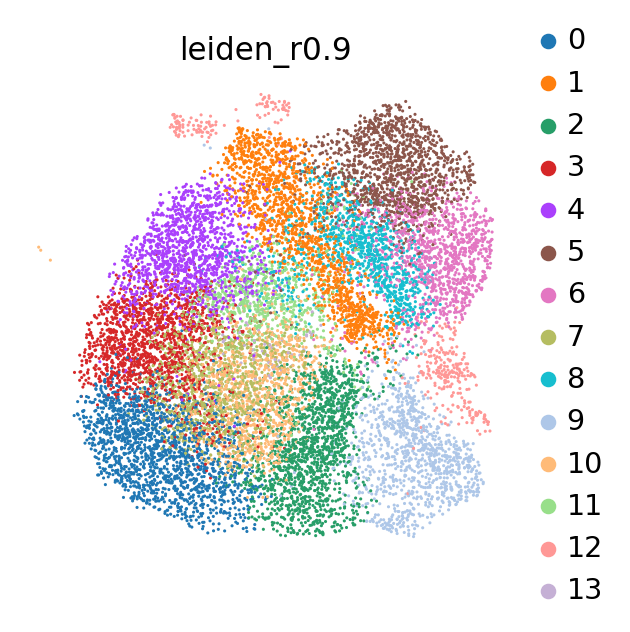

In [13]:
sc.pl.umap(adata, color=['leiden_r0.9'], ncols=1, frameon=False)

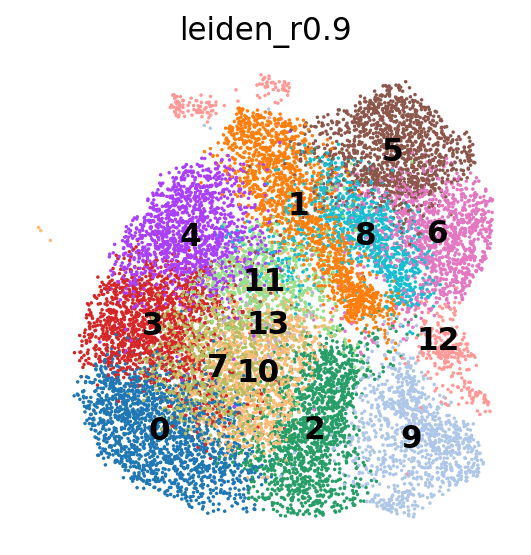

In [14]:
sc.pl.umap(adata, color='leiden_r0.9', legend_loc='on data', size=10, frameon=False)

In [15]:
scv.pp.filter_genes(adata, min_shared_counts=10)
scv.pp.normalize_per_cell(adata)
adata.raw = adata

Filtered out 7884 genes that are detected in less than 10 counts (shared).
Normalized count data: spliced, unspliced.


In [16]:
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=None)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 2207 genes that are detected in less than 30 counts (shared).
computing neighbors
    finished (0:00:13) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:13) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [17]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:15) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [18]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:01:41) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:06) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


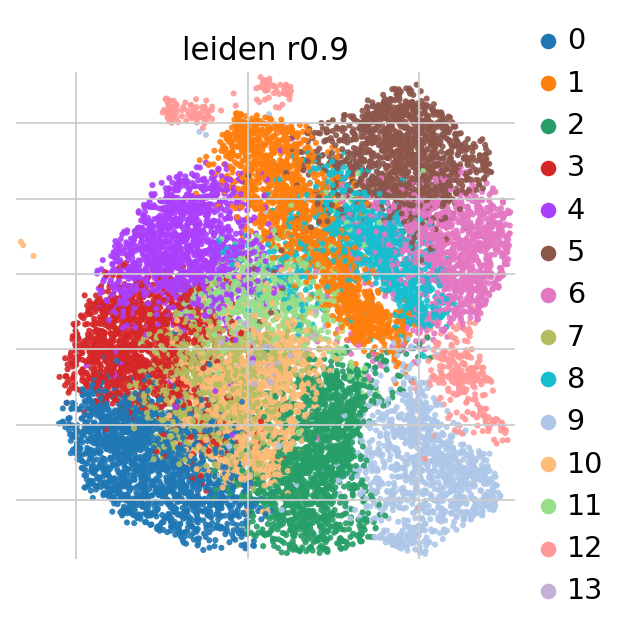

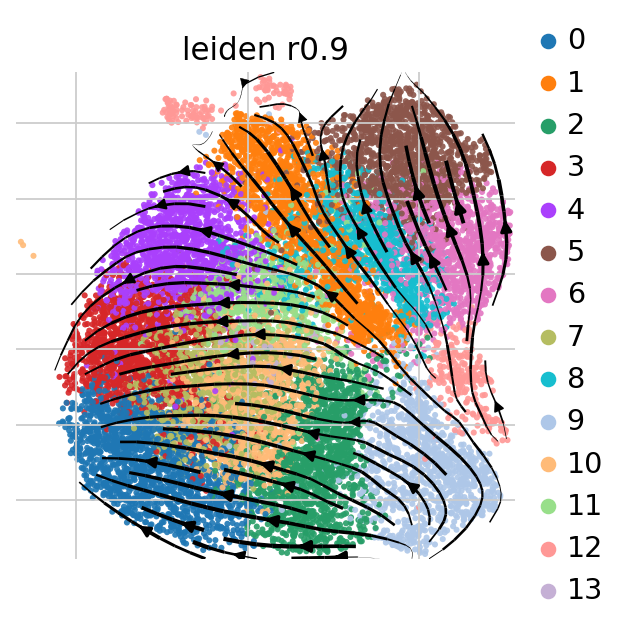

In [19]:
scv.pl.velocity_embedding_stream(adata, color='leiden_r0.9', legend_loc='right margin', density=0, size=30, alpha=0.9)
scv.pl.velocity_embedding_stream(adata, color='leiden_r0.9', legend_loc='right margin', density=0.5, size=30, alpha=0.9)

In [20]:
metab = {
    'fattyacid':['Ldlr','Acox1','Acsl1',],
    'b-oxidation':['Acadl','Acadm','Echs1','Hadha','Hadh','Ech1','Hadhb','Acaa2'],
    'glucose':['Phkb','Pgk1','Pkm'],
    'tca':['Pdha1','Dlat','Idh2','Ogdh','Suclg2','Sdhb','Mdh1']   
}
oxphos = {
    'flavo':['Etfa','Etfb','Etfdh'],
    'mito-ribo':['Mrpl14','Mrpl4','Mrpl42'],
    'prot-import':['Immp2l','Grpel1'],
    'complexI':['Ndufa10','Ndufa5','Ndufa8','Ndufab1','Ndufb10','Ndufb3','Ndufb7','Ndufs8'],
    'complexII':['Sdhb','Sdhaf2'],
    'complexIII':['Uqcrq'],
    'complexIV':['Cyc1','Cox5a','Cox6b1','Cox6a1','Cox19'],
    'complxV':['Atp5d','Atp5g1','Atp5h']
}

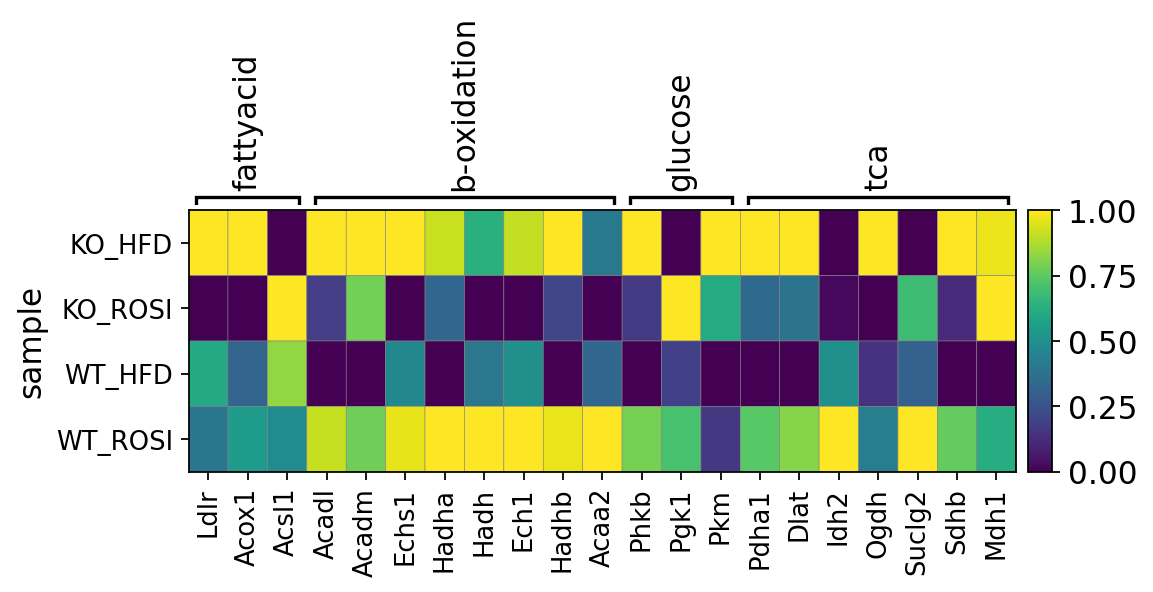

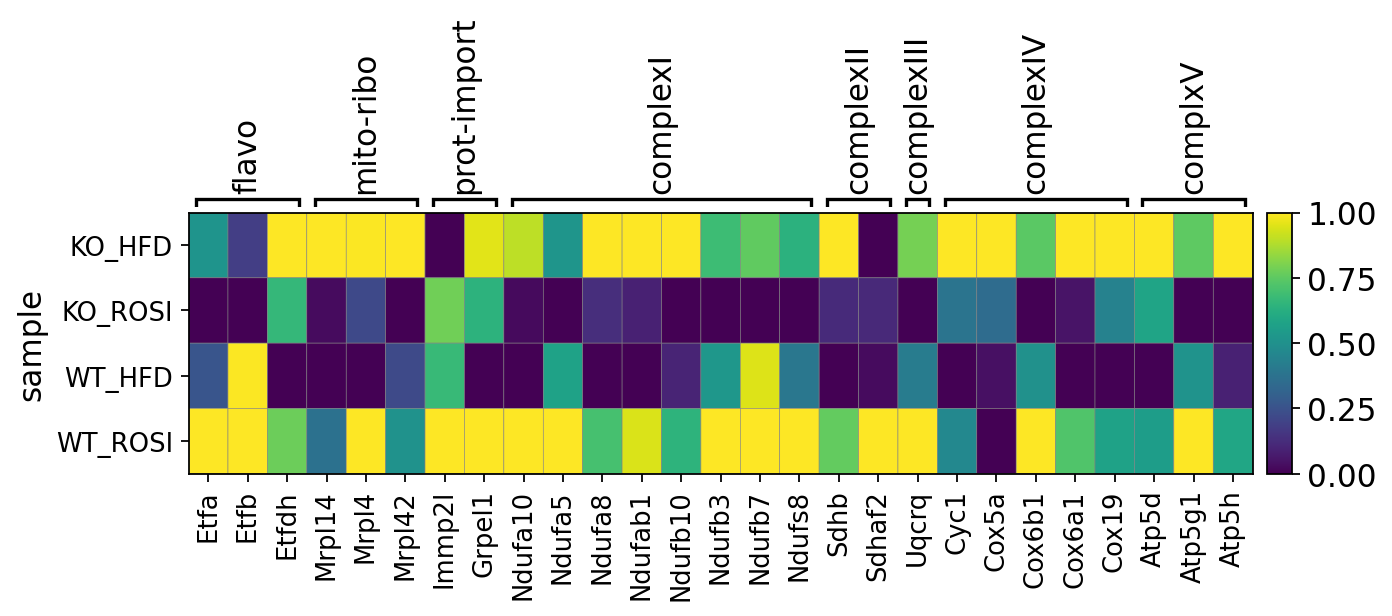

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[8.64, 0, 0.2])

In [21]:
sc.pl.matrixplot(adata, var_names=metab, standard_scale='var', groupby='sample')
sc.pl.matrixplot(adata, var_names=oxphos, standard_scale='var', groupby='sample')

In [22]:
adata.uns['leiden_r0.9_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5'], dtype=object)

In [23]:
adata.uns['leiden_r0.9_colors'][0] = '#ffbb78'
adata.uns['leiden_r0.9_colors'][10] = '#1f77b4'
# adata.uns['leiden_r0.9_colors'][2] = '#ffff00'
# adata.uns['leiden_r0.9_colors'][3] = '#eef5fc'
# adata.uns['leiden_r0.9_colors'][4] = '#ffff00'
# adata.uns['leiden_r0.9_colors'][5] = '#ffff00'

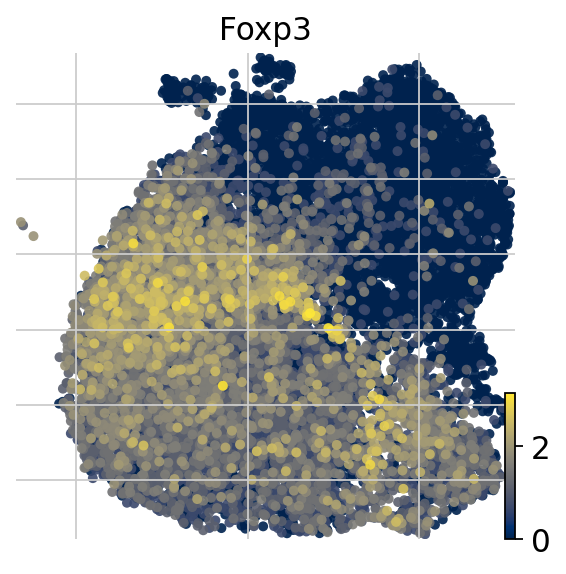

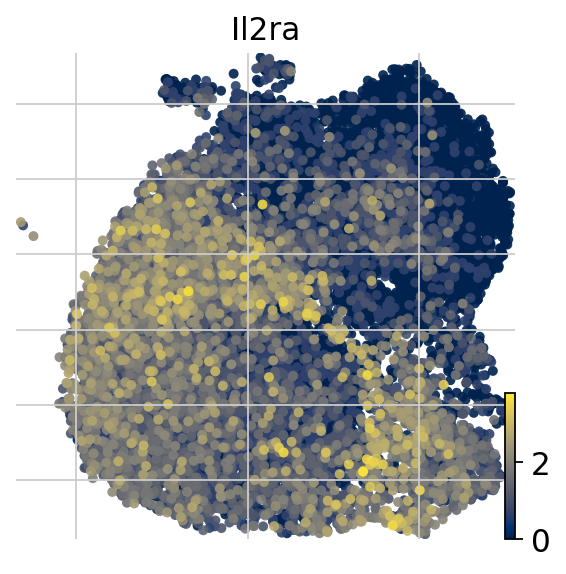

In [24]:
scv.pl.velocity_embedding_stream(adata, color='Foxp3', legend_loc='right margin', density=0, size=80, alpha=0.9, color_map='cividis')
scv.pl.velocity_embedding_stream(adata, color='Il2ra', legend_loc='right margin', density=0, size=80, alpha=0.9, color_map='cividis')

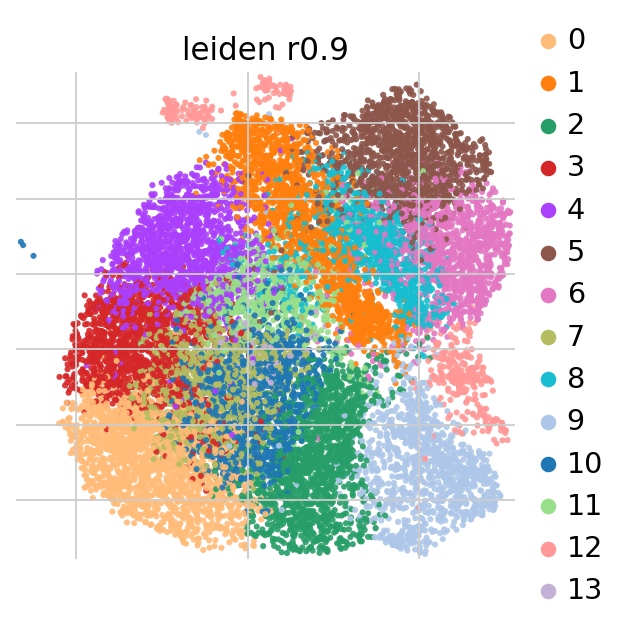

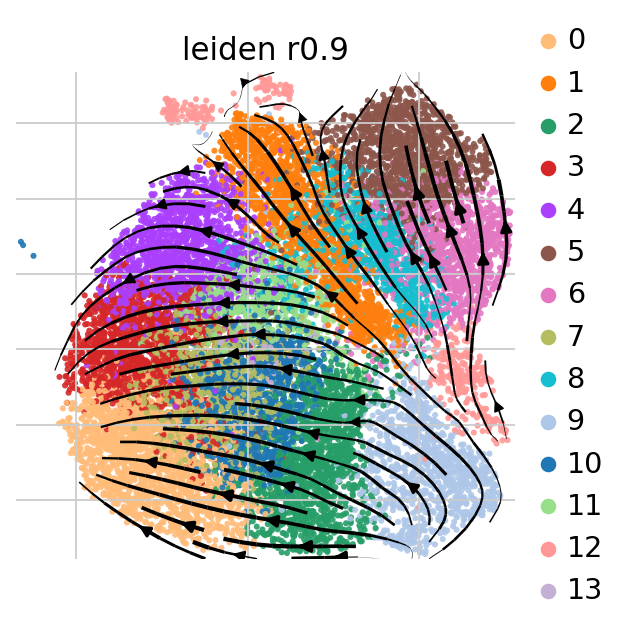

In [25]:
scv.pl.velocity_embedding_stream(adata, color='leiden_r0.9', legend_loc='right margin', density=0, size=30, alpha=0.9)
# scv.pl.velocity_embedding_stream(adata, color='Foxp3', legend_loc='right margin', density=0, size=80, alpha=0.9, color_map='Blues')
# scv.pl.velocity_embedding_stream(adata, color='Il2ra', legend_loc='right margin', density=0, size=80, alpha=0.9, color_map='Blues')
scv.pl.velocity_embedding_stream(adata, color='leiden_r0.9', legend_loc='right margin', density=0.5, size=30, alpha=0.9)

In [26]:
sc.tl.embedding_density(adata, basis='umap', groupby='sample')

computing density on 'umap'
--> added
    'umap_density_sample', densities (adata.obs)
    'umap_density_sample_params', parameter (adata.uns)


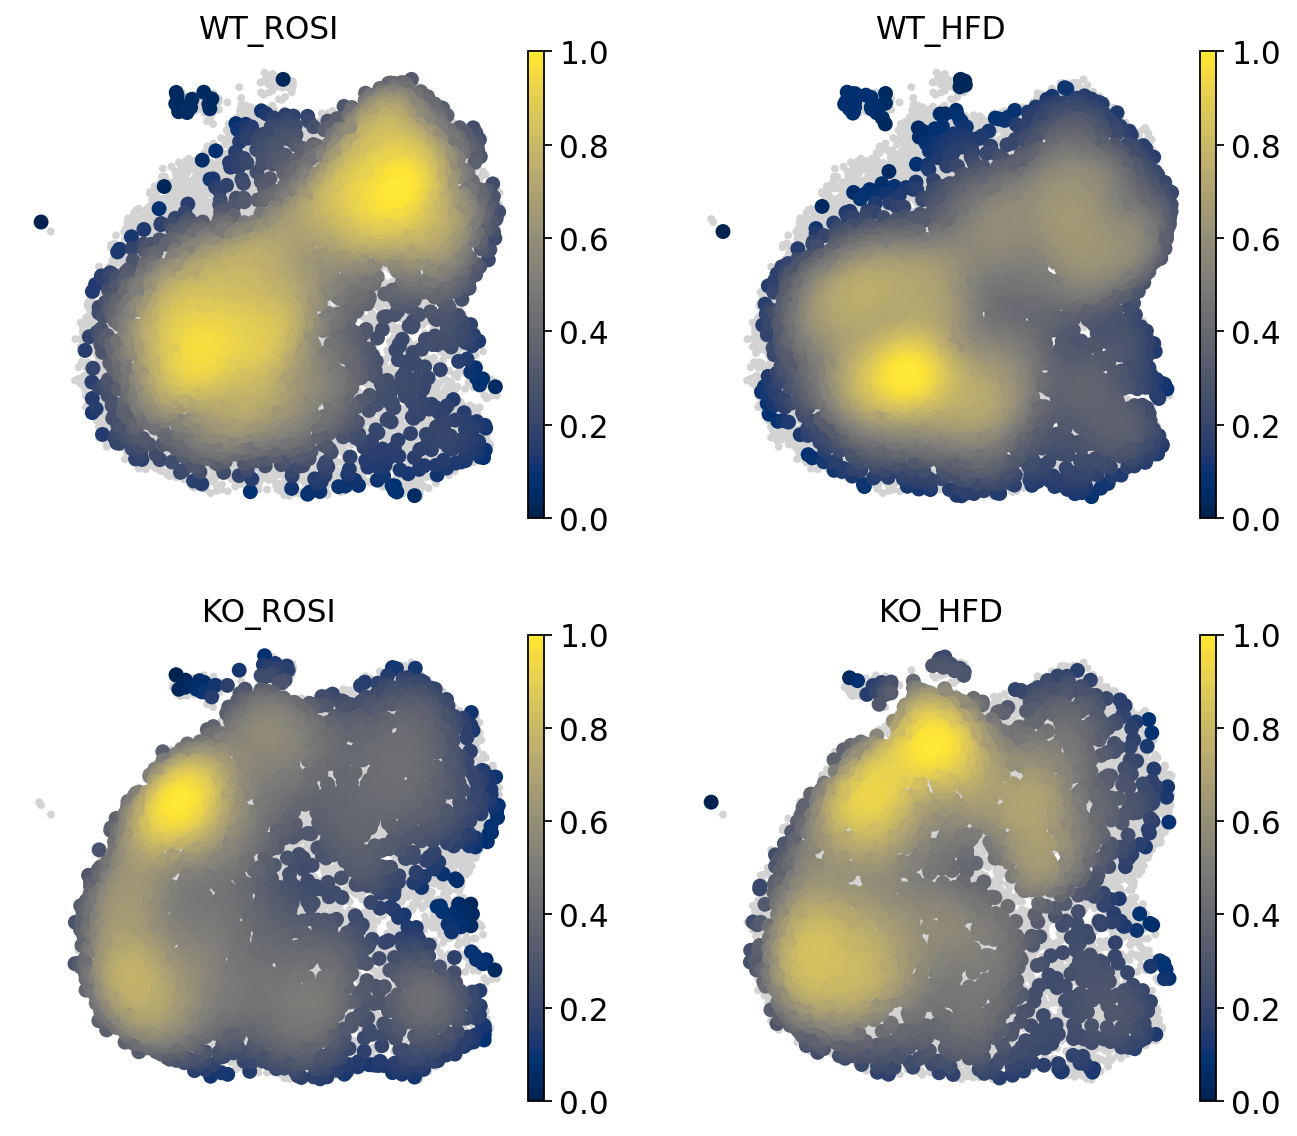

In [27]:
sc.pl.embedding_density(adata, basis='umap', key='umap_density_sample', group=['WT_ROSI', 'WT_HFD', 'KO_ROSI','KO_HFD'], color_map='cividis', ncols=2, bg_dotsize=50, frameon=False)

In [28]:
## Subset to remove Tregs
subset=['1','5','6','8','12']
cd4 = adata[adata.obs['leiden_r0.9'].isin(subset)]

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


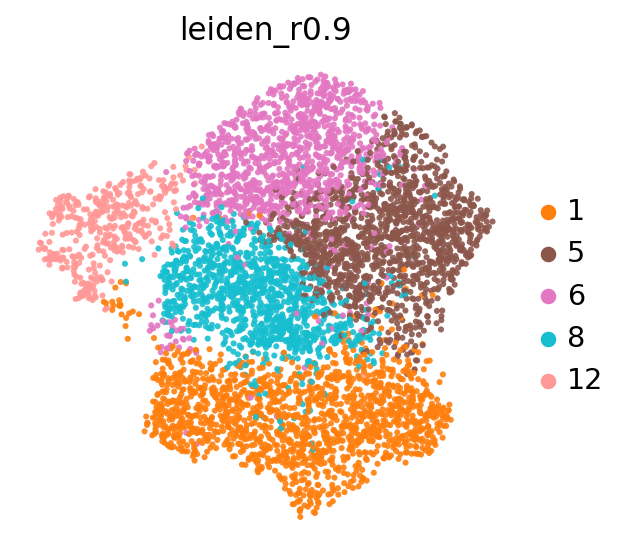

In [29]:
## Recompute UMAP after subsetting
sc.pp.neighbors(cd4, n_neighbors=25, n_pcs=20, random_state=1)
sc.tl.umap(cd4)
sc.pl.umap(cd4, color='leiden_r0.9', frameon=False, size=30, alpha=0.9)

In [30]:
sc.tl.embedding_density(cd4, basis='umap', groupby='sample')

computing density on 'umap'
--> added
    'umap_density_sample', densities (adata.obs)
    'umap_density_sample_params', parameter (adata.uns)


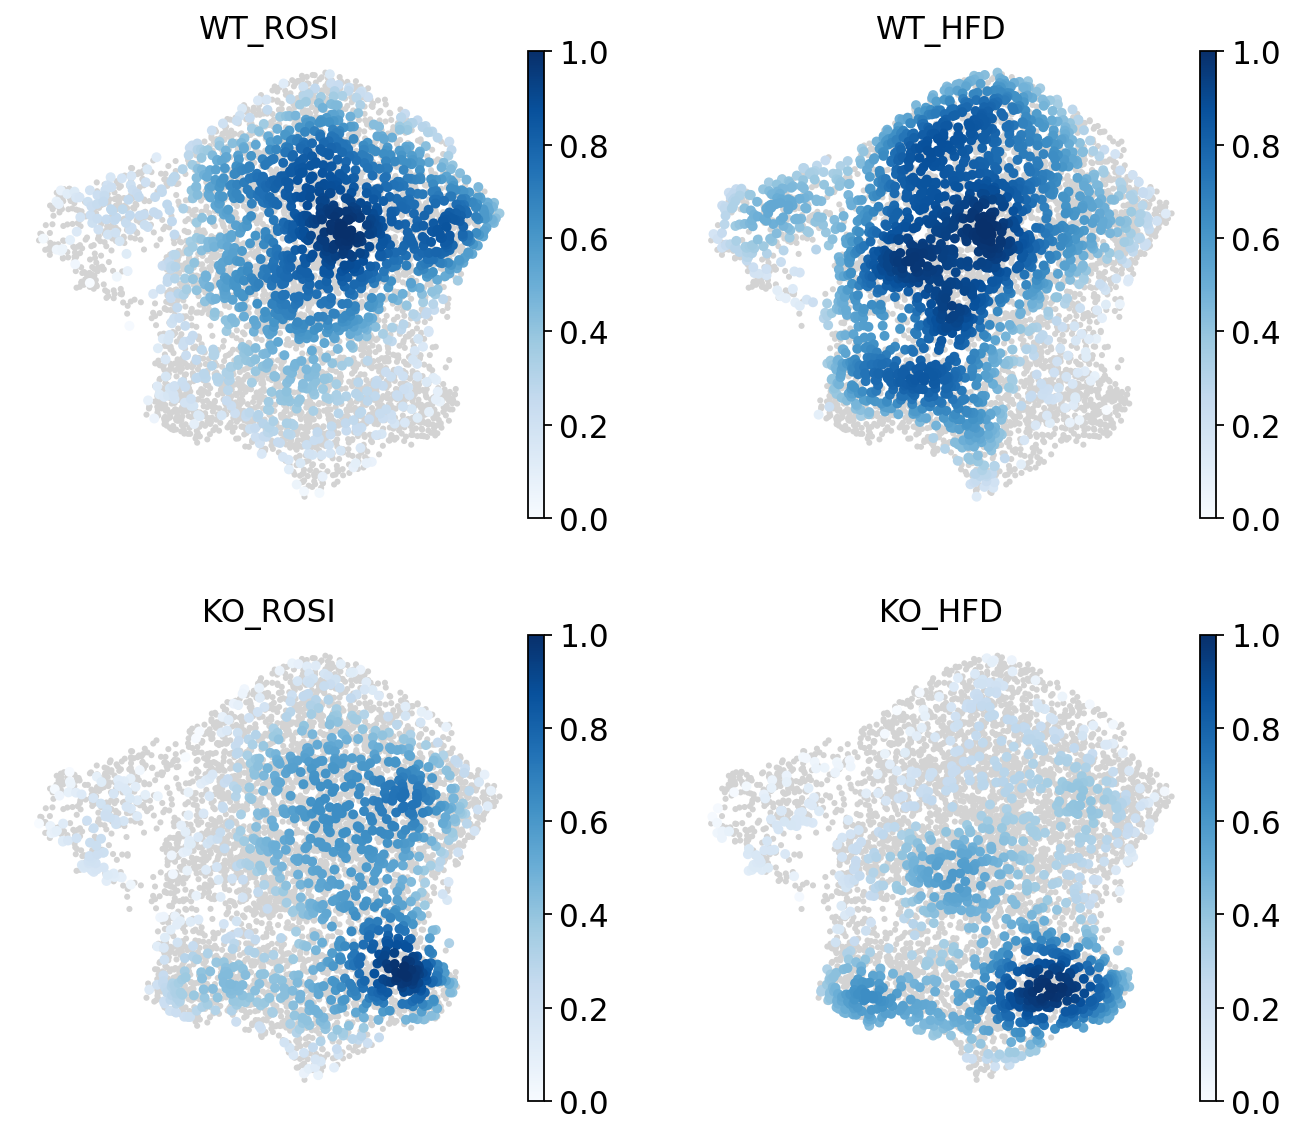

In [31]:
sc.pl.embedding_density(cd4, basis='umap', key='umap_density_sample', group=['WT_ROSI', 'WT_HFD', 'KO_ROSI','KO_HFD'], color_map='Blues', ncols=2,
                        bg_dotsize=30, fg_dotsize=80, frameon=False)

In [32]:
## Re-filter after removing Tregs
scv.pp.filter_genes(cd4, min_shared_counts=10)
scv.pp.normalize_per_cell(cd4)

Filtered out 426 genes that are detected in less than 10 counts (shared).


In [33]:
scv.pp.filter_and_normalize(cd4, min_shared_counts=30, n_top_genes=None)
scv.pp.moments(cd4, n_pcs=30, n_neighbors=30)

Filtered out 1501 genes that are detected in less than 30 counts (shared).
computing neighbors
    finished (0:00:01) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [34]:
scv.tl.velocity(cd4)

computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [35]:
scv.tl.velocity_graph(cd4)

computing velocity graph
    finished (0:00:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


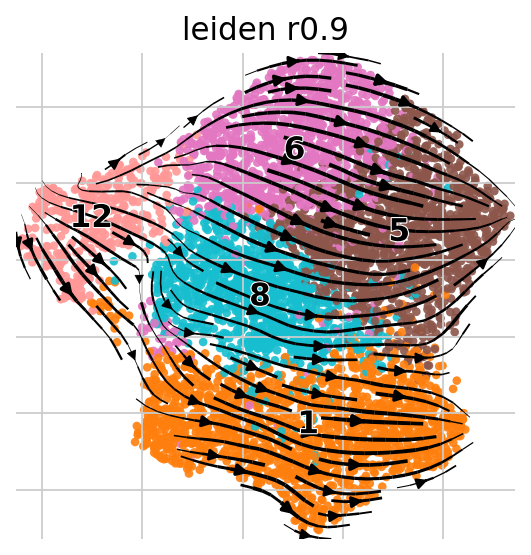

In [36]:
scv.pl.velocity_embedding_stream(cd4, color='leiden_r0.9', legend_loc='on data', size=60, alpha=0.9, density=0.65)

In [37]:
cd4.write('Fig3_filteredGEX_velocyto_processed.h5ad')

## Feeds into Figure3.ipynb plotting notebook